In [19]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.sparse as sp
import os

from functions import plot_DA_week

DATA LOADING


In [25]:
# 1) Day-Ahead market prices

folder_path = "data/energy-charts_day_ahead"
years = [2023, 2024]# Define the years you want to import, we have from 2015 to 2024
file_paths = [os.path.join(folder_path, f"energy-charts_DA_{year}.csv") for year in years]

df_list = []
for path in file_paths:
    df = pd.read_csv(path, sep=',', decimal='.', skiprows=[0])  # skip the metadata row
    df.columns = ['timestamp', 'price_eur_mwh'] 
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True) # Convert timestamp to datetime
    df['price_eur_mwh'] = pd.to_numeric(df['price_eur_mwh'], errors='coerce') # Convert price to numeric, coerce errors to NaN
    df_list.append(df)

# Merge the DA market price dataframes
merged_DA = pd.concat(df_list, ignore_index=True)
merged_DA = merged_DA.dropna(subset=['timestamp', 'price_eur_mwh']) # Drop rows with NaN values in timestamp or price
merged_DA = merged_DA.sort_values('timestamp').reset_index(drop=True)# Sort by timestamp and reset index
print(merged_DA.head())
print(merged_DA.tail())

                  timestamp  price_eur_mwh
0 2022-12-31 23:00:00+00:00           0.03
1 2023-01-01 00:00:00+00:00          -7.25
2 2023-01-01 01:00:00+00:00          -3.99
3 2023-01-01 02:00:00+00:00          -7.71
4 2023-01-01 03:00:00+00:00          -9.71
                      timestamp  price_eur_mwh
17539 2024-12-31 18:00:00+00:00         125.02
17540 2024-12-31 19:00:00+00:00         114.76
17541 2024-12-31 20:00:00+00:00         110.09
17542 2024-12-31 21:00:00+00:00         113.60
17543 2024-12-31 22:00:00+00:00         106.00


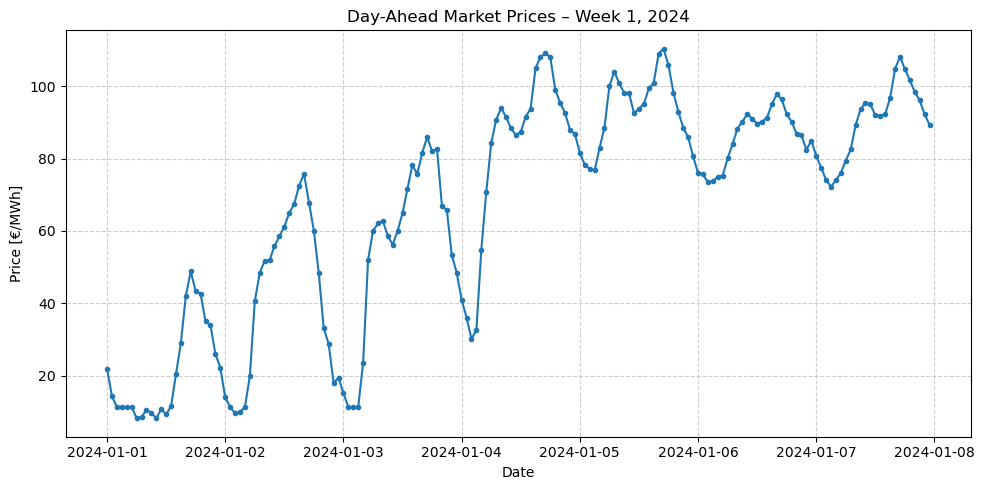

In [28]:
plot_DA_week(merged_DA, year=2024, week=1)